In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import SGDClassifier
import shap
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as pl
import matplotlib

# Loading the dataset

In [20]:
data_df = pd.read_csv('..\\data\\data_100.csv')
# cardiac_filtered = data_df[['CardiacLim','DiffPercentPeakVO2','DiffPeakVO2','75_to_100_VO2Slope', '75_to_100_HRSlope','PeakVE',
# 'MinO2Pulse','VO2vsPeakVO2atVT','75_to_100_VCO2Slope','O2PulseDiff','MeanVE','50_to_75_O2Slope',
# '75_to_100_VESlope','O2PulsePercent','MeanVCO2','75_to_100_RERSlope','MeanRER','PeakVO2Real',
# '50_to_75_VO2Slope','75_to_100_O2Slope','25_to_50_VESlope','15_to_85_VESlope','MeanVO2',
# 'DiffPeakRER','25_to_50_VCO2Slope']]

In [21]:
cardiac_top_features = ['DiffPercentPeakVO2', 'DiffPeakVO2','75_to_100_VO2Slope','75_to_100_HRSlope','MinO2Pulse',
                      'PeakVE','VO2vsPeakVO2atVT','second_half_RRSlope','second_half_VO2Slope','75_to_100_VCO2Slope','MeanVE',
                      'second_half_VESlope','O2PulseDiff','50_to_75_O2Slope', 'O2PulsePercent','75_to_100_RERSlope','PeakRER',
                      '50_to_75_VO2Slope','PeakVO2Real']
pulmonary_top_features = ['O2PulsePercent', 'O2PulseDiff','first_half_VO2Slope','LowestVE/VCO2',
                      'first_half_VCO2Slope', '15_to_85_RRSlope','PeakRR','50_to_75_RRSlope','MeanO2Pulse','VEvsVCO2Slope',
                     '25_to_50_VCO2Slope','StdHeartRate']
other_top_features =['PeakRR', 'PeakVE','PeakVCO2','MeanVCO2','PeakVO2','PeakVO2Real',
                  'LowestVE/VCO2','MeanRER','PeakRER','VO2vsPeakVO2atVT','DiffPercentPeakVO2','MeanRR',
                  '75_to_100_VEVCO2Slope','DiffPeakVO2','MeanVE','second_half_VESlope','first_half_VEVCO2Slope',
                  '0_to_25_O2Slope','VO2atVT', 'MeanVO2','second_half_VCO2Slope','DiffPeakHR','MeanVE/VCO2','75_to_100_RRSlope']

In [22]:
cardiac_100 = data_df[cardiac_top_features]
pulmonary_100 = data_df[pulmonary_top_features]
other_100 = data_df[other_top_features]

In [23]:
# load the model from disk
cardiac_loaded_model = pickle.load(open('..\\models\\cardiac\\clf_cardiac_100.sav', 'rb'))
cardiac_scaler = pickle.load(open('..\\models\\cardiac\\scaler_clf_cardiac_100.sav', 'rb'))
pulmonary_loaded_model = pickle.load(open('..\\models\\pulmonary\\clf_pulmonary_100.sav', 'rb'))
pulmonary_scaler = pickle.load(open('..\\models\\pulmonary\\scaler_clf_pulmonary_100.sav', 'rb'))
other_loaded_model = pickle.load(open('..\\models\\other\\clf_other_100.sav', 'rb'))
other_scaler = pickle.load(open('..\\models\\other\\scaler_clf_other_100.sav', 'rb'))

In [24]:
cardiac_scaler.fit(data_df[cardiac_top_features])
X_scaled_c = cardiac_scaler.transform(data_df[cardiac_top_features])
pulmonary_scaler.fit(data_df[pulmonary_top_features])
X_scaled_p = pulmonary_scaler.transform(data_df[pulmonary_top_features])
other_scaler.fit(data_df[other_top_features])
X_scaled_o = other_scaler.transform(data_df[other_top_features])

In [25]:
len(cardiac_top_features)

19

In [26]:
data_df['CardiacLimProba']=cardiac_loaded_model.predict_proba(X_scaled_c)[:,1]
data_df['PulmonaryLimBalancedProba']=pulmonary_loaded_model.predict_proba(X_scaled_p)[:,1]
data_df['MuscleSkeletalLimUnBalancedProba']=other_loaded_model.predict_proba(X_scaled_o)[:,1]

In [197]:
data_export = data_df[['SessionId','PatientId','CardiacLimProba', 'CardiacLim','PulmonaryLimBalancedProba','PulmonaryLim',
                'MuscleSkeletalLim','MuscleSkeletalLimUnBalancedProba']]
data_export = data_export.rename(columns={'PulmonaryLimBalancedProba': 'PulmonaryProba', 
                                            'MuscleSkeletalLim': 'OtherLim',
                                            'MuscleSkeletalLimUnBalancedProba': 'OtherProba'})

In [200]:
data_export.head(-20)

SessionId  PatientId  CardiacLimProba  CardiacLim  PulmonaryProba  \
0          7.0        7.0         0.450933           1        0.077381   
1          8.0        8.0         0.152569           1        0.017000   
2          9.0        9.0         0.147244           0        0.014167   
3         10.0       10.0         0.102986           0        0.050000   
4         11.0       11.0         0.113637           0        0.022500   
..         ...        ...              ...         ...             ...   
194      204.0      204.0         0.001429           0        0.000000   
195      205.0      205.0         0.001429           0        0.000000   
196      206.0      206.0         0.004931           0        0.000000   
197      207.0      207.0         0.000000           0        0.000000   
198      208.0      208.0         0.019401           0        0.000000   

     PulmonaryLim  OtherLim  OtherProba  
0               0         0    0.000000  
1               0         0    0.410556  
2               0         0    0.055476  
3               0         0    0.103810  
4               0         0    0.158476  
..            ...       ...         ...  
194             0         0    0.000000  
195             0         0    0.000000  
196             0         0    0.000000  
197             0         0    0.000000  
198             0         0    0.066667  

[199 rows x 8 columns]

In [ ]:
cardiac_loaded_model_100 = pickle.load(open('..\\models\\cardiac\\clf_cardiac_100.sav', 'rb'))
cardiac_scaler_100 = pickle.load(open('..\\models\\cardiac\\scaler_clf_cardiac_100.sav', 'rb'))
pulmonary_loaded_model_100 = pickle.load(open('..\\models\\pulmonary\\clf_pulmonary_100.sav', 'rb'))
pulmonary_scaler_100 = pickle.load(open('..\\models\\pulmonary\\scaler_clf_pulmonary_100.sav', 'rb'))
other_loaded_model_100 = pickle.load(open('..\\models\\other\\clf_other_100.sav', 'rb'))
other_scaler_100 = pickle.load(open('..\\models\\other\\scaler_clf_other_100.sav', 'rb'))

In [ ]:
cardiac_scaler.fit(data_df[cardiac_top_features])
X_scaled_c = cardiac_scaler.transform(data_df[cardiac_top_features])
pulmonary_scaler.fit(data_df[pulmonary_top_features])
X_scaled_p = pulmonary_scaler.transform(data_df[pulmonary_top_features])
other_scaler.fit(data_df[other_top_features])
X_scaled_o = other_scaler.transform(data_df[other_top_features])

In [207]:
cardiac_data_100 = ['CardiacLim','DiffPercentPeakVO2', 'DiffPeakVO2','75_to_100_VO2Slope','75_to_100_HRSlope','MinO2Pulse',
                      'PeakVE','VO2vsPeakVO2atVT','second_half_RRSlope','second_half_VO2Slope','75_to_100_VCO2Slope','MeanVE',
                      'second_half_VESlope','O2PulseDiff','50_to_75_O2Slope',
                        'O2PulsePercent','75_to_100_RERSlope','PeakRER','50_to_75_VO2Slope','PeakVO2Real']
cardiac_data_90 = ['CardiacLim','DiffPercentPeakVO2','DiffPeakVO2','MinO2Pulse','second_half_VEVO2Slope',
                '25_to_50_VCO2Slope','VO2vsPeakVO2atVT','PeakVE','15_to_85_VO2Slope','first_half_VEVCO2Slope',
                '25_to_50_VO2Slope','MeanVO2','25_to_50_VESlope','PeakVO2Real','PeakVO2', '15_to_85_VESlope',
                   'second_half_RRSlope','PeakRER','second_half_VCO2Slope','O2PulsePercent','15_to_85_VCO2Slope',
                   '75_to_100_VESlope','MeanVE','first_half_VO2Slope','second_half_VESlope','first_half_VEVO2Slope',
                   '75_to_100_HRSlope','DiffPercentPeakHR','15_to_85_HRSlope']
cardiac_data_80 = ['CardiacLim','DiffPercentPeakVO2','DiffPeakVO2','first_half_VEVCO2Slope','MinO2Pulse','15_to_85_VO2Slope',
                   '25_to_50_VEVCO2Slope','MeanVO2','PeakVO2Real','PeakVO2','MeanHeartRate','first_half_VO2Slope',
                  'first_half_VEVO2Slope','O2PulsePercent','StdHeartRate','second_half_VEVO2Slope','75_to_100_RRSlope',
                  'DiffPeakHR','PredictedMaxHR']
cardiac_data_70 = ['CardiacLim','DiffPercentPeakVO2','15_to_85_VO2Slope','PeakVO2Real','DiffPeakVO2','MinO2Pulse','PeakVO2',
                   'first_half_VEVCO2Slope','MeanVO2','15_to_85_VCO2Slope','PeakVCO2','StdO2Pulse','PredictedMaxHR',
                   '15_to_85_VESlope','MeanVCO2']
cardiac_data_60 = ['CardiacLim','50_to_75_VO2Slope','50_to_75_VCO2Slope','DiffPercentPeakVO2','15_to_85_VO2Slope','StdO2Pulse',
                  '50_to_75_VESlope','first_half_VEVCO2Slope','PeakVO2','MinO2Pulse','PeakVO2Real','O2PulsePercent',
                  'MeanVO2','StdHeartRate','LowestVE/VCO2','VEvsVCO2Slope','50_to_75_HRSlope',
                  '15_to_85_VEVO2Slope']
cardiac_data_50 = ['CardiacLim','StdO2Pulse','15_to_85_VEVCO2Slope','DiffPercentPeakVO2','second_half_VCO2Slope',
                'MeanVE/VCO2','second_half_VO2Slope','second_half_VESlope','PeakVO2Real','MinO2Pulse','PeakVO2','O2PulseDiff',
                'StdHeartRate','15_to_85_VEVO2Slope','VEvsVCO2Slope','second_half_HRSlope']
cardiac_data_40 = ['CardiacLim','StdO2Pulse','DiffPercentPeakVO2','second_half_VEVCO2Slope','MinO2Pulse','O2PulseDiff',
                   'PeakVO2','PeakVO2Real','O2PulsePercent','VEvsVCO2Slope','MaxO2Pulse','LowestVE/VCO2','MeanVE/VCO2',
                  'second_half_VEVO2Slope','second_half_HRSlope','second_half_VCO2Slope','PeakVCO2','StdVE/VCO2']

In [208]:
pulmonary_data_100 = ['PulmonaryLim','O2PulsePercent', 'O2PulseDiff','first_half_VO2Slope','LowestVE/VCO2',
                      'first_half_VCO2Slope', '15_to_85_RRSlope','PeakRR','50_to_75_RRSlope','MeanO2Pulse','VEvsVCO2Slope',
                     '25_to_50_VCO2Slope','StdHeartRate']
pulmonary_data_90 = ['PulmonaryLim','O2PulsePercent','O2PulseDiff','second_half_RRSlope','LowestVE/VCO2',
                    'second_half_VESlope','PeakRR','75_to_100_VESlope','75_to_100_RRSlope','PeakVE','VEvsVCO2Slope',
                    'MaxO2Pulse','StdHeartRate','MeanVO2','MeanVE']
pulmonary_data_80 = ['PulmonaryLim','O2PulsePercent','O2PulseDiff','LowestVE/VCO2','first_half_VO2Slope',
                    'first_half_VCO2Slope','VEvsVCO2Slope','75_to_100_RRSlope','MeanO2Pulse']
pulmonary_data_70 = ['PulmonaryLim','O2PulsePercent','O2PulseDiff','LowestVE/VCO2','VEvsVCO2Slope','MaxO2Pulse',
                     'second_half_RRSlope','first_half_VO2Slope','MeanVCO2','MeanVO2']
pulmonary_data_60 = ['PulmonaryLim','O2PulsePercent','O2PulseDiff','LowestVE/VCO2','MeanVO2','MeanVCO2','second_half_RRSlope',
                    'MaxO2Pulse','15_to_85_VCO2Slope','second_half_VEVO2Slope','PeakVO2Real']
pulmonary_data_50 = ['PulmonaryLim','O2PulsePercent','O2PulseDiff','DiffPercentPeakVO2','15_to_85_VO2Slope','75_to_100_RRSlope',
                     'PeakVE','MeanVO2','MaxO2Pulse','MeanVCO2','PeakVO2','PeakVCO2','MaxO2_EST']
pulmonary_data_40 = ['PulmonaryLim','O2PulsePercent','O2PulseDiff','DiffPercentPeakVO2','PeakVE','PeakVO2',
                    'PeakVO2Real','MaxO2Pulse','StdO2Pulse','MeanRR','PeakVCO2','MeanVO2','MeanVE',
                    'DiffPercentPeakHR','MeanHeartRate','LowestRR','DiffPeakHR','StdHeartRate','LowestVE/VCO2']

In [209]:
other_data_100 = ['MuscleSkeletalLim','PeakRR', 'PeakVE','PeakVCO2','MeanVCO2','PeakVO2','PeakVO2Real',
                  'LowestVE/VCO2','MeanRER','PeakRER','VO2vsPeakVO2atVT','DiffPercentPeakVO2','MeanRR',
                  '75_to_100_VEVCO2Slope','DiffPeakVO2','MeanVE','second_half_VESlope','first_half_VEVCO2Slope',
                  '0_to_25_O2Slope','VO2atVT', 'MeanVO2','second_half_VCO2Slope','DiffPeakHR','MeanVE/VCO2','75_to_100_RRSlope']
other_data_90 = ['MuscleSkeletalLim','PeakVE','PeakRR','PeakVCO2','DiffPercentPeakVO2','PeakVO2','PeakVO2Real',
                'MeanRER','MeanRR','0_to_25_O2Slope','DiffPeakVO2','LowestVE/VCO2','MeanVCO2','MeanO2Pulse',
                 '75_to_100_HRSlope','MeanVE','0_to_25_VESlope','MeanVO2','VEvsVCO2Slope','0_to_25_VO2Slope',
                'second_half_VEVCO2Slope']
other_data_80 = ['MuscleSkeletalLim','PeakVCO2','PeakRR','PeakVE','LowestVE/VCO2','DiffPercentPeakVO2','MeanVCO2',
                'PeakVO2','PeakVO2Real','O2PulseDiff','DiffPeakVO2','MeanVO2','O2PulsePercent','0_to_25_HRSlope',
                 'MeanVE','MeanO2Pulse','VEvsVCO2Slope','MeanRER','PeakRER','second_half_VCO2Slope','15_to_85_RRSlope',
                 '50_to_75_VEVCO2Slope']
other_data_70 = ['MuscleSkeletalLim','first_half_O2Slope','PeakVCO2','DiffPercentPeakVO2','LowestVE/VCO2','PeakVE',
                'PeakVO2','PeakVO2Real','PeakRR','O2PulseDiff','O2PulsePercent','MeanVCO2','DiffPeakVO2',
                '0_to_25_VO2Slope','MeanO2Pulse','50_to_75_VO2Slope','MeanVO2','0_to_25_O2Slope','DiffPercentPeakHR']
other_data_60 = ['MuscleSkeletalLim','first_half_O2Slope','LowestVE/VCO2','PeakVCO2','PeakVE','DiffPercentPeakVO2',
                'O2PulsePercent','PeakVO2','PeakVO2Real','15_to_85_VEVCO2Slope','O2PulseDiff',
                 '0_to_25_HRSlope','MeanVCO2','first_half_VO2Slope','MeanVO2','PeakRR','MeanO2Pulse','second_half_VO2Slope',
                'MeanVE/VCO2','VEvsVCO2Slope','0_to_25_VCO2Slope']
other_data_50 = ['MuscleSkeletalLim','first_half_O2Slope','LowestVE/VCO2','25_to_50_O2Slope','0_to_25_HRSlope',
                 'first_half_VESlope','75_to_100_VO2Slope','first_half_VO2Slope','PeakVCO2','MeanVCO2','MeanVE/VCO2',
                '75_to_100_O2Slope','75_to_100_VCO2Slope','VEvsVCO2Slope','DiffPercentPeakVO2','HRvsVO2Slope',
                'PeakVO2','50_to_75_VEVCO2Slope']
other_data_40 = ['MuscleSkeletalLim','LowestVE/VCO2','MeanVCO2','first_half_HRSlope','MeanVO2','first_half_VO2Slope',
                'PeakVCO2','O2PulseDiff','MeanVE/VCO2','O2PulsePercent','PeakVO2','first_half_O2Slope',
                'second_half_VCO2Slope','PeakVE','MeanO2Pulse']

In [211]:
list_cardiac_features = [cardiac_data_100, cardiac_data_90, cardiac_data_80, cardiac_data_70, cardiac_data_60, cardiac_data_50, cardiac_data_40]
list_pulmonary_features = [pulmonary_data_100, pulmonary_data_90, pulmonary_data_80, pulmonary_data_70, pulmonary_data_60, pulmonary_data_50, pulmonary_data_40]
list_other_features = [other_data_100, other_data_90, other_data_80, other_data_70, other_data_60, other_data_50, other_data_40]

In [ ]:
cardiac_scaler.fit(data_df[cardiac_top_features])
X_scaled_c = cardiac_scaler.transform(data_df[cardiac_top_features])
pulmonary_scaler.fit(data_df[pulmonary_top_features])
X_scaled_p = pulmonary_scaler.transform(data_df[pulmonary_top_features])
other_scaler.fit(data_df[other_top_features])
X_scaled_o = other_scaler.transform(data_df[other_top_features])

In [221]:
data_export_dynamic = data_export[['SessionId','PatientId','CardiacLim','PulmonaryLim','OtherLim']]
times_data = [100, 90, 80, 70, 60, 50, 40]
for i in range(0,len(times_data)):
    #*********CARDIAC**************
    cardiac_loaded_model = pickle.load(open(f'..\\models\\cardiac\\clf_cardiac_{times_data[i]}.sav', 'rb'))
    cardiac_loaded_scaler = pickle.load(open(f'..\\models\\cardiac\\scaler_clf_cardiac_{times_data[i]}.sav', 'rb'))
    cardiac_loaded_scaler.fit(data_df[list_cardiac_features[i][1:]])
    X_scaled_c = cardiac_loaded_scaler.transform(data_df[list_cardiac_features[i][1:]])
    data_export_dynamic['CardiacLimProba_'+str(times_data[i])]=cardiac_loaded_model.predict_proba(X_scaled_c)[:,1]
    #*********Pulmonary**************
    pulmonary_loaded_model = pickle.load(open(f'..\\models\\pulmonary\\clf_pulmonary_{times_data[i]}.sav', 'rb'))
    pulmonary_loaded_scaler = pickle.load(open(f'..\\models\\pulmonary\\scaler_clf_pulmonary_{times_data[i]}.sav', 'rb'))
    pulmonary_loaded_scaler.fit(data_df[list_pulmonary_features[i][1:]])
    X_scaled_p = pulmonary_loaded_scaler.transform(data_df[list_pulmonary_features[i][1:]])
    data_export_dynamic['PulmonaryLimProba_'+str(times_data[i])]=pulmonary_loaded_model.predict_proba(X_scaled_p)[:,1]
    #*********Other**************
    other_loaded_model = pickle.load(open(f'..\\models\\other\\clf_other_{times_data[i]}.sav', 'rb'))
    other_loaded_scaler = pickle.load(open(f'..\\models\\other\\scaler_clf_other_{times_data[i]}.sav', 'rb'))
    other_loaded_scaler.fit(data_df[list_other_features[i][1:]])
    X_scaled_o = other_loaded_scaler.transform(data_df[list_other_features[i][1:]])
    data_export_dynamic['OtherLimProba_'+str(times_data[i])]=other_loaded_model.predict_proba(X_scaled_o)[:,1]
    pass
data_export_dynamic.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SessionId  PatientId  CardiacLim  PulmonaryLim  OtherLim  \
0        7.0        7.0           1             0         0   
1        8.0        8.0           1             0         0   
2        9.0        9.0           0             0         0   
3       10.0       10.0           0             0         0   
4       11.0       11.0           0             0         0   

   CardiacLimProba_100  PulmonaryLimProba_100  OtherLimProba_100  \
0             0.450933               0.077381           0.000000   
1             0.152569               0.017000           0.410556   
2             0.147244               0.014167           0.055476   
3             0.102986               0.050000           0.103810   
4             0.113637               0.022500           0.158476   

   CardiacLimProba_90  PulmonaryLimProba_90  ...  OtherLimProba_70  \
0            0.299762              0.058000  ...          0.004000   
1            0.477060              0.102778  ...          0.333667   
2            0.118250              0.049167  ...          0.006667   
3            0.128250              0.051905  ...          0.023000   
4            0.118250              0.032500  ...          0.015000   

   CardiacLimProba_60  PulmonaryLimProba_60  OtherLimProba_60  \
0            0.007500               0.00000          0.000000   
1            0.070238               0.23754          0.105333   
2            0.000000               0.00000          0.024000   
3            0.022750               0.00000          0.024000   
4            0.004167               0.00000          0.024000   

   CardiacLimProba_50  PulmonaryLimProba_50  OtherLimProba_50  \
0            0.000000              0.005000          0.020000   
1            0.070679              0.051333          0.081000   
2            0.295042              0.000000          0.156310   
3            0.279161              0.000000          0.078333   
4            0.300280              0.000000          0.088333   

   CardiacLimProba_40  PulmonaryLimProba_40  OtherLimProba_40  
0            0.078667              0.000000          0.070410  
1            0.452079              0.038889          0.154108  
2            0.269333              0.020000          0.065962  
3            0.320000              0.020000          0.112131  
4            0.244333              0.000000          0.068131  

[5 rows x 26 columns]

In [222]:
data_export_dynamic.to_csv('data_export_dynamic.csv')

In [ ]:
data_df['CardiacLimProba']=cardiac_loaded_model.predict_proba(X_scaled_c)[:,1]
data_df['PulmonaryLimBalancedProba']=pulmonary_loaded_model.predict_proba(X_scaled_p)[:,1]
data_df['MuscleSkeletalLimUnBalancedProba']=other_loaded_model.predict_proba(X_scaled_o)[:,1]

In [202]:
data_export_dynamic = data_export[['SessionId','PatientId','CardiacLim','PulmonaryLim','OtherLim']]
data_export_dynamic.head()

SessionId  PatientId  CardiacLim  PulmonaryLim  OtherLim
0        7.0        7.0           1             0         0
1        8.0        8.0           1             0         0
2        9.0        9.0           0             0         0
3       10.0       10.0           0             0         0
4       11.0       11.0           0             0         0

In [199]:
data_export.to_csv('cpet_full_proba.csv')

0.9819277108433735


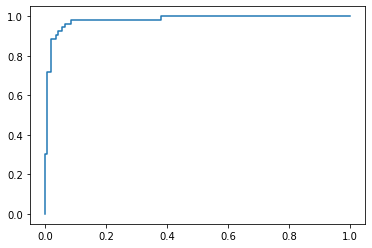

In [27]:
fpr, tpr, _ = metrics.roc_curve(data_df.CardiacLim, data_df.CardiacLimProba) 
fpr, tpr, thresholds = metrics.roc_curve(data_df.CardiacLim, data_df.CardiacLimProba) 
print(metrics.auc(fpr, tpr))
auc = metrics.roc_auc_score(data_df.CardiacLim, data_df.CardiacLimProba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

0.9479872459147071


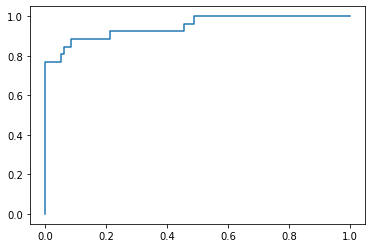

In [28]:
fpr, tpr, _ = metrics.roc_curve(data_df.PulmonaryLim, data_df.PulmonaryLimBalancedProba) 
fpr, tpr, thresholds = metrics.roc_curve(data_df.PulmonaryLim, data_df.PulmonaryLimBalancedProba) 
print(metrics.auc(fpr, tpr))
auc = metrics.roc_auc_score(data_df.PulmonaryLim, data_df.PulmonaryLimBalancedProba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

0.9673052362707535


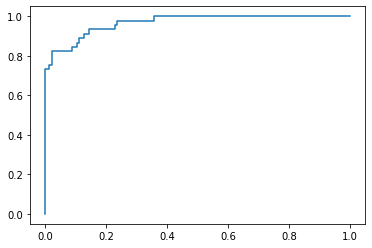

In [29]:
fpr, tpr, _ = metrics.roc_curve(data_df.MuscleSkeletalLim, data_df.MuscleSkeletalLimUnBalancedProba) 
fpr, tpr, thresholds = metrics.roc_curve(data_df.MuscleSkeletalLim, data_df.MuscleSkeletalLimUnBalancedProba) 
print(metrics.auc(fpr, tpr))
auc = metrics.roc_auc_score(data_df.MuscleSkeletalLim, data_df.MuscleSkeletalLimUnBalancedProba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

In [12]:
cardiac_explainer = shap.TreeExplainer(cardiac_loaded_model, data=data_df[cardiac_top_features])
cardiac_shap_values = cardiac_explainer.shap_values(data_df[cardiac_top_features])

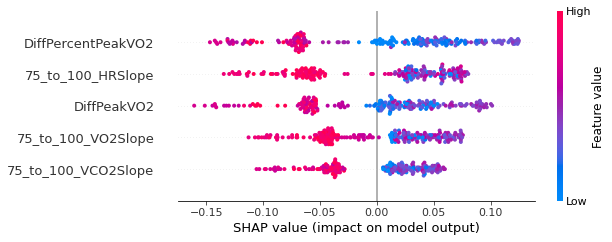

In [13]:
shap.summary_plot(cardiac_shap_values[1], data_df[cardiac_top_features], plot_type='dot', max_display=5)

In [14]:
shap.initjs()

In [15]:
shap.force_plot(cardiac_explainer.expected_value[1], cardiac_shap_values[1][-50,:], feature_names=cardiac_top_features,link='identity', contribution_threshold=0.9, matplotlib=False)

In [16]:
shap.force_plot(cardiac_explainer.expected_value[1], cardiac_shap_values[1][-1,:], 
                feature_names=cardiac_top_features,link='identity', contribution_threshold=0.9)

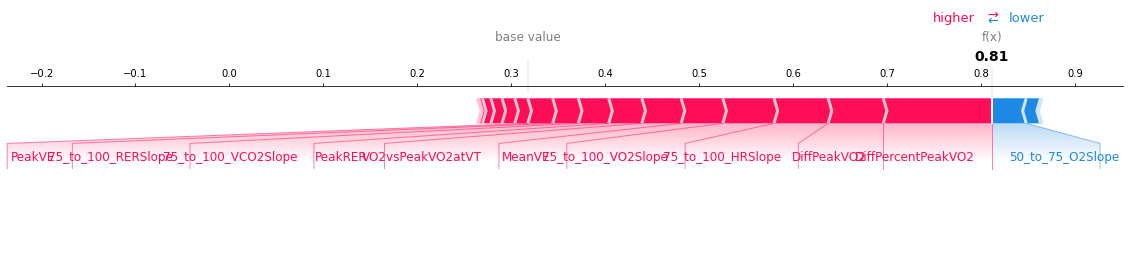

In [17]:
shap.force_plot(cardiac_explainer.expected_value[1], cardiac_shap_values[1][-50,:], feature_names=cardiac_top_features,link='identity',  matplotlib=True)

In [18]:
import numpy
numpy.version.version

'1.20.3'

In [30]:
from typing import TypeVar
import numpy as np
import numpy.typing as npt

In [31]:
from numpy.typing import _ScalarLike

Scalar = _ScalarLike

In [45]:
import colors as colors

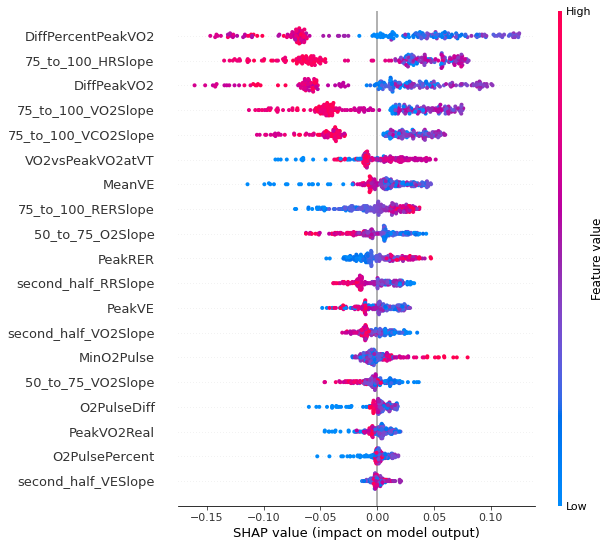

In [130]:
shap.summary_plot(cardiac_shap_values[1], data_df[cardiac_top_features], plot_type='dot', max_display=20)
shap_values = cardiac_shap_values[1]


In [55]:
isinstance(shap_values, list)
plot_type=None
if plot_type is None:
    plot_type = "dot" # default for single output explanations
    assert len(shap_values.shape) != 1
color = colors.blue_rgb

features =  data_df[cardiac_top_features]
str(type(features))

"<class 'pandas.core.frame.DataFrame'>"

In [65]:
idx2cat = None
feature_names = None
# convert from a DataFrame or other types
if str(type(features)) == "<class 'pandas.core.frame.DataFrame'>":
    if feature_names is None:
        feature_names = features.columns
        # feature index to category flag
        idx2cat = features.dtypes.astype(str).isin(["object", "category"]).tolist()
        features = features.values
elif isinstance(features, list):
    if feature_names is None:
        feature_names = features
    features = None
elif (features is not None) and len(features.shape) == 1 and feature_names is None:
    feature_names = features
    features = None
multi_class = False
num_features = (shap_values[0].shape[1] if multi_class else shap_values.shape[1])
num_features

19

In [163]:
feature_names
idx2cat
features.shape
features[1]

array([ 5.76940073e-01, -1.12415904e+00,  7.50901813e-02,  7.71428571e+00,
        2.68912507e-03,  6.15264320e+01,  5.21092204e-01,  1.33911310e+00,
        1.00276767e-01,  1.80712003e-01,  2.65316451e+01,  6.52463104e+00,
       -3.49352354e-03,  5.86335916e-01,  7.43136490e-01,  7.28601615e-02,
        1.15822166e+00,  1.32594495e-01,  1.53305089e+00])

In [181]:
labels = {
    'MAIN_EFFECT': "SHAP main effect value for\n%s",
    'INTERACTION_VALUE': "SHAP interaction value",
    'INTERACTION_EFFECT': "SHAP interaction value for\n%s and %s",
    'VALUE': "SHAP value (impact on model output)",
    'GLOBAL_VALUE': "mean(|SHAP value|) (average impact on model output magnitude)",
    'VALUE_FOR': "SHAP value for\n%s",
    'PLOT_FOR': "SHAP plot for %s",
    'FEATURE': "Feature %s",
    'FEATURE_VALUE': "Feature value",
    'FEATURE_VALUE_LOW': "Low",
    'FEATURE_VALUE_HIGH': "High",
    'JOINT_VALUE': "Joint SHAP value",
    'MODEL_OUTPUT': "Model output value"
}

In [185]:
def summary_with_highlight(shap_values, features=None, max_display=None, row_highlight=None,sort=True,plot_size="auto", 
                            axis_color="#333333",plot_type='dot',alpha=1,cmap=colors.red_blue, alt_cmap = colors.red_blue,
                            show=True, class_inds=None, color_bar_label=labels["FEATURE_VALUE"],color_bar=True):
    color = colors.blue_rgb

    idx2cat = None
    feature_names = None
    # convert from a DataFrame or other types
    if str(type(features)) == "<class 'pandas.core.frame.DataFrame'>":
        if feature_names is None:
            feature_names = features.columns
            # feature index to category flag
            idx2cat = features.dtypes.astype(str).isin(["object", "category"]).tolist()
            features = features.values
    multi_class = False
    num_features = (shap_values[0].shape[1] if multi_class else shap_values.shape[1])
    if max_display is None:
        max_display = 20
    
    if sort:
        # order features by the sum of their effect magnitudes
        if multi_class:
            feature_order = np.argsort(np.sum(np.mean(np.abs(shap_values), axis=1), axis=0))
        else:
            feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))
        feature_order = feature_order[-min(max_display, len(feature_order)):]
    else:
        feature_order = np.flip(np.arange(min(max_display, num_features)), 0)

    row_height = 0.4
    if plot_size == "auto":
        pl.gcf().set_size_inches(8, len(feature_order) * row_height + 1.5)
    elif type(plot_size) in (list, tuple):
        pl.gcf().set_size_inches(plot_size[0], plot_size[1])
    elif plot_size is not None:
        pl.gcf().set_size_inches(8, len(feature_order) * plot_size + 1.5)
    pl.axvline(x=0, color="#999999", zorder=-1)

    if plot_type == "dot":
        for pos, i in enumerate(feature_order):
            pl.axhline(y=pos, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)
            shaps = shap_values[:, i]
            values = None if features is None else features[:, i]
            inds = np.arange(len(shaps))
            np.random.shuffle(inds)
            if values is not None:
                values = values[inds]
            shaps = shaps[inds]
            colored_feature = True

            try:
                if idx2cat is not None and idx2cat[i]: # check categorical feature
                    colored_feature = False
                else:
                    values = np.array(values, dtype=np.float64)  # make sure this can be numeric
            except:
                colored_feature = False
            N = len(shaps)
            # hspacing = (np.max(shaps) - np.min(shaps)) / 200
            # curr_bin = []
            nbins = 100
            quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
            inds = np.argsort(quant + np.random.randn(N) * 1e-6)
            layer = 0
            last_bin = -1
            ys = np.zeros(N)
            for ind in inds:
                if quant[ind] != last_bin:
                    layer = 0
                ys[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
                layer += 1
                last_bin = quant[ind]
            ys *= 0.9 * (row_height / np.max(ys + 1))
            
            if features is not None and colored_feature:
                # trim the color range, but prevent the color range from collapsing
                vmin = np.nanpercentile(values, 5)
                vmax = np.nanpercentile(values, 95)
                if vmin == vmax:
                    vmin = np.nanpercentile(values, 1)
                    vmax = np.nanpercentile(values, 99)
                    if vmin == vmax:
                        vmin = np.min(values)
                        vmax = np.max(values)
                if vmin > vmax: # fixes rare numerical precision issues
                    vmin = vmax
                assert features.shape[0] == len(shaps), "Feature and SHAP matrices must have the same number of rows!"

                # plot the nan values in the interaction feature as grey
                nan_mask = np.isnan(values)
                pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777", vmin=vmin,
                           vmax=vmax, s=16, alpha=alpha, linewidth=0,
                           zorder=3, rasterized=len(shaps) > 500)

                # plot the non-nan values colored by the trimmed feature value
                cvals = values[np.invert(nan_mask)].astype(np.float64)
                cvals_imp = cvals.copy()
                cvals_imp[np.isnan(cvals)] = (vmin + vmax) / 2.0
                cvals[cvals_imp > vmax] = vmax
                cvals[cvals_imp < vmin] = vmin
                xxx= shaps[np.invert(nan_mask)]
                yyy = pos + ys[np.invert(nan_mask)]

                pl.scatter(shaps[np.invert(nan_mask)], pos + ys[np.invert(nan_mask)],
                           cmap=cmap, vmin=vmin, vmax=vmax, s=16,
                           c=cvals, alpha=alpha, linewidth=0,
                           zorder=3, rasterized=len(shaps) > 500)

                if row_highlight is not None:
                    col_green = np.array(["yellow"])
                    pl.scatter(xxx[row_highlight], pos,#yyy[-1],
                           cmap=None, vmin=vmin, vmax=vmax, s=64,
                           c=col_green, 
                           alpha=alpha, linewidth=0,
                           zorder=3, rasterized=len(shaps) > 500)
            else:

                pl.scatter(shaps, pos + ys, s=16, alpha=alpha, linewidth=0, zorder=3,
                           color=color if colored_feature else "#777777", rasterized=len(shaps) > 500)


    if color_bar and features is not None and plot_type != "bar" and \
            (plot_type != "layered_violin" or color in pl.cm.datad):
        import matplotlib.cm as cm
        m = cm.ScalarMappable(cmap=cmap if plot_type != "layered_violin" else pl.get_cmap(color))
        m.set_array([0, 1])
        cb = pl.colorbar(m, ticks=[0, 1], aspect=1000)
        cb.set_ticklabels([labels['FEATURE_VALUE_LOW'], labels['FEATURE_VALUE_HIGH']])
        cb.set_label(color_bar_label, size=12, labelpad=0)
        cb.ax.tick_params(labelsize=11, length=0)
        cb.set_alpha(1)
        cb.outline.set_visible(False)
        bbox = cb.ax.get_window_extent().transformed(pl.gcf().dpi_scale_trans.inverted())
        cb.ax.set_aspect((bbox.height - 0.9) * 20)
        # cb.draw_all()

    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('none')
    pl.gca().spines['right'].set_visible(False)
    pl.gca().spines['top'].set_visible(False)
    pl.gca().spines['left'].set_visible(False)
    pl.gca().tick_params(color=axis_color, labelcolor=axis_color)
    pl.yticks(range(len(feature_order)), [feature_names[i] for i in feature_order], fontsize=13)
    if plot_type != "bar":
        pl.gca().tick_params('y', length=20, width=0.5, which='major')
    pl.gca().tick_params('x', labelsize=11)
    pl.ylim(-1, len(feature_order))
    if plot_type == "bar":
        pl.xlabel(labels['GLOBAL_VALUE'], fontsize=13)
    else:
        pl.xlabel(labels['VALUE'], fontsize=13)
    if show:
        pl.show()
    pass

In [187]:
from custom_shap import summary_with_highlight as swh

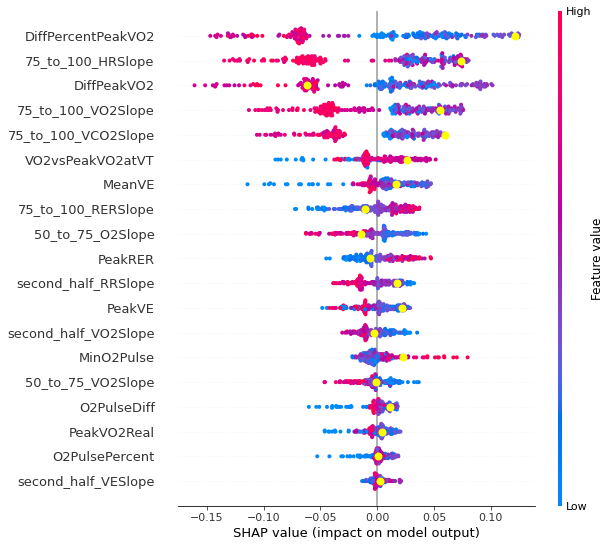

In [188]:
swh(cardiac_shap_values[1], data_df[cardiac_top_features], row_highlight=0)

In [179]:
cardiac_top_features[12]

'O2PulseDiff'

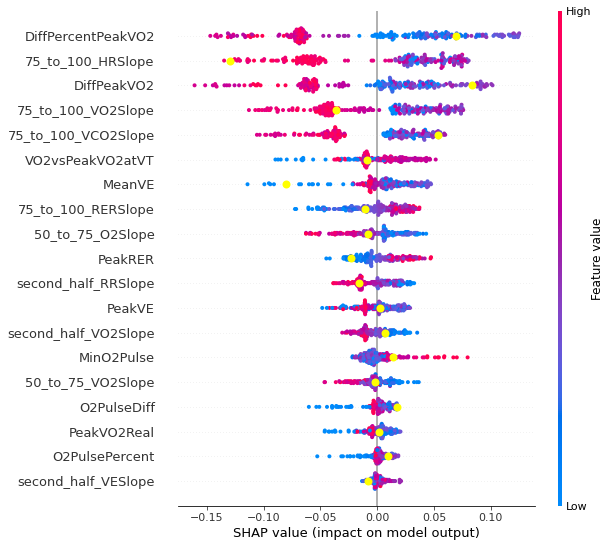

In [186]:
summary_with_highlight(cardiac_shap_values[1], data_df[cardiac_top_features], row_highlight=0)#, plot_type='dot', max_display=5)

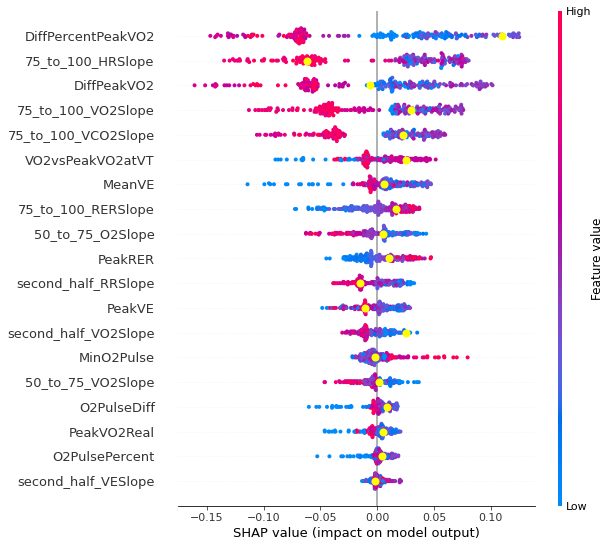

In [190]:
import custom_shap as cshap
cshap.summary_with_highlight(cardiac_shap_values[1], data_df[cardiac_top_features], row_highlight=0)

In [ ]:
def summary_legacy(shap_values, features=None, feature_names=None, max_display=None, plot_type=None,
                 color=None, axis_color="#333333", title=None, alpha=1, show=True, sort=True,
                 color_bar=True, plot_size="auto", layered_violin_max_num_bins=20, class_names=None,
                 class_inds=None,
                 color_bar_label=labels["FEATURE_VALUE"],
                 cmap=colors.red_blue,
                 # depreciated
                 auto_size_plot=None,
                 use_log_scale=False):
    """Create a SHAP beeswarm plot, colored by feature values when they are provided.

    Parameters
    ----------
    shap_values : numpy.array
        For single output explanations this is a matrix of SHAP values (# samples x # features).
        For multi-output explanations this is a list of such matrices of SHAP values.

    features : numpy.array or pandas.DataFrame or list
        Matrix of feature values (# samples x # features) or a feature_names list as shorthand

    feature_names : list
        Names of the features (length # features)

    max_display : int
        How many top features to include in the plot (default is 20, or 7 for interaction plots)

    plot_type : "dot" (default for single output), "bar" (default for multi-output), "violin",
        or "compact_dot".
        What type of summary plot to produce. Note that "compact_dot" is only used for
        SHAP interaction values.

    plot_size : "auto" (default), float, (float, float), or None
        What size to make the plot. By default the size is auto-scaled based on the number of
        features that are being displayed. Passing a single float will cause each row to be that 
        many inches high. Passing a pair of floats will scale the plot by that
        number of inches. If None is passed then the size of the current figure will be left
        unchanged.
    """
    """
    # support passing an explanation object
    if str(type(shap_values)).endswith("Explanation'>"):
        shap_exp = shap_values
        base_value = shap_exp.base_values
        shap_values = shap_exp.values
        if features is None:
            features = shap_exp.data
        if feature_names is None:
            feature_names = shap_exp.feature_names
        # if out_names is None: # TODO: waiting for slicer support of this
        #     out_names = shap_exp.output_names
    # deprecation warnings
    if auto_size_plot is not None:
        warnings.warn("auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.")
    """

    multi_class = False
    if isinstance(shap_values, list):
        multi_class = True
        if plot_type is None:
            plot_type = "bar" # default for multi-output explanations
        assert plot_type == "bar", "Only plot_type = 'bar' is supported for multi-output explanations!"
    else:
        if plot_type is None:
            plot_type = "dot" # default for single output explanations
        assert len(shap_values.shape) != 1, "Summary plots need a matrix of shap_values, not a vector."

    # default color:
    if color is None:
        if plot_type == 'layered_violin':
            color = "coolwarm"
        elif multi_class:
            color = lambda i: colors.red_blue_circle(i/len(shap_values))
        else:
            color = colors.blue_rgb

    idx2cat = None
    # convert from a DataFrame or other types
    if str(type(features)) == "<class 'pandas.core.frame.DataFrame'>":
        if feature_names is None:
            feature_names = features.columns
        # feature index to category flag
        idx2cat = features.dtypes.astype(str).isin(["object", "category"]).tolist()
        features = features.values
    elif isinstance(features, list):
        if feature_names is None:
            feature_names = features
        features = None
    elif (features is not None) and len(features.shape) == 1 and feature_names is None:
        feature_names = features
        features = None

    num_features = (shap_values[0].shape[1] if multi_class else shap_values.shape[1])

    if features is not None:
        shape_msg = "The shape of the shap_values matrix does not match the shape of the " \
                    "provided data matrix."
        if num_features - 1 == features.shape[1]:
            assert False, shape_msg + " Perhaps the extra column in the shap_values matrix is the " \
                          "constant offset? Of so just pass shap_values[:,:-1]."
        else:
            assert num_features == features.shape[1], shape_msg

    if feature_names is None:
        feature_names = np.array([labels['FEATURE'] % str(i) for i in range(num_features)])

    if use_log_scale:
        pl.xscale('symlog')

    # # plotting SHAP interaction values
    # if not multi_class and len(shap_values.shape) == 3:

    #     if plot_type == "compact_dot":
    #         new_shap_values = shap_values.reshape(shap_values.shape[0], -1)
    #         new_features = np.tile(features, (1, 1, features.shape[1])).reshape(features.shape[0], -1)

    #         new_feature_names = []
    #         for c1 in feature_names:
    #             for c2 in feature_names:
    #                 if c1 == c2:
    #                     new_feature_names.append(c1)
    #                 else:
    #                     new_feature_names.append(c1 + "* - " + c2)

    #         return summary_legacy(
    #             new_shap_values, new_features, new_feature_names,
    #             max_display=max_display, plot_type="dot", color=color, axis_color=axis_color,
    #             title=title, alpha=alpha, show=show, sort=sort,
    #             color_bar=color_bar, plot_size=plot_size, class_names=class_names,
    #             color_bar_label="*" + color_bar_label
    #         )

    #     if max_display is None:
    #         max_display = 7
    #     else:
    #         max_display = min(len(feature_names), max_display)

    #     sort_inds = np.argsort(-np.abs(shap_values.sum(1)).sum(0))

    #     # get plotting limits
    #     delta = 1.0 / (shap_values.shape[1] ** 2)
    #     slow = np.nanpercentile(shap_values, delta)
    #     shigh = np.nanpercentile(shap_values, 100 - delta)
    #     v = max(abs(slow), abs(shigh))
    #     slow = -v
    #     shigh = v

    #     pl.figure(figsize=(1.5 * max_display + 1, 0.8 * max_display + 1))
    #     pl.subplot(1, max_display, 1)
    #     proj_shap_values = shap_values[:, sort_inds[0], sort_inds]
    #     proj_shap_values[:, 1:] *= 2  # because off diag effects are split in half
    #     summary_legacy(
    #         proj_shap_values, features[:, sort_inds] if features is not None else None,
    #         feature_names=feature_names[sort_inds],
    #         sort=False, show=False, color_bar=False,
    #         plot_size=None,
    #         max_display=max_display
    #     )
    #     pl.xlim((slow, shigh))
    #     pl.xlabel("")
    #     title_length_limit = 11
    #     pl.title(shorten_text(feature_names[sort_inds[0]], title_length_limit))
    #     for i in range(1, min(len(sort_inds), max_display)):
    #         ind = sort_inds[i]
    #         pl.subplot(1, max_display, i + 1)
    #         proj_shap_values = shap_values[:, ind, sort_inds]
    #         proj_shap_values *= 2
    #         proj_shap_values[:, i] /= 2  # because only off diag effects are split in half
    #         summary_legacy(
    #             proj_shap_values, features[:, sort_inds] if features is not None else None,
    #             sort=False,
    #             feature_names=["" for i in range(len(feature_names))],
    #             show=False,
    #             color_bar=False,
    #             plot_size=None,
    #             max_display=max_display
    #         )
    #         pl.xlim((slow, shigh))
    #         pl.xlabel("")
    #         if i == min(len(sort_inds), max_display) // 2:
    #             pl.xlabel(labels['INTERACTION_VALUE'])
    #         pl.title(shorten_text(feature_names[ind], title_length_limit))
    #     pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)
    #     pl.subplots_adjust(hspace=0, wspace=0.1)
    #     if show:
    #         pl.show()
    #     return

    if max_display is None:
        max_display = 20

    if sort:
        # order features by the sum of their effect magnitudes
        if multi_class:
            feature_order = np.argsort(np.sum(np.mean(np.abs(shap_values), axis=1), axis=0))
        else:
            feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))
        feature_order = feature_order[-min(max_display, len(feature_order)):]
    else:
        feature_order = np.flip(np.arange(min(max_display, num_features)), 0)

    row_height = 0.4
    if plot_size == "auto":
        pl.gcf().set_size_inches(8, len(feature_order) * row_height + 1.5)
    elif type(plot_size) in (list, tuple):
        pl.gcf().set_size_inches(plot_size[0], plot_size[1])
    elif plot_size is not None:
        pl.gcf().set_size_inches(8, len(feature_order) * plot_size + 1.5)
    pl.axvline(x=0, color="#999999", zorder=-1)

    if plot_type == "dot":
        for pos, i in enumerate(feature_order):
            pl.axhline(y=pos, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)
            shaps = shap_values[:, i]
            values = None if features is None else features[:, i]
            inds = np.arange(len(shaps))
            np.random.shuffle(inds)
            if values is not None:
                values = values[inds]
            shaps = shaps[inds]
            colored_feature = True
            try:
                if idx2cat is not None and idx2cat[i]: # check categorical feature
                    colored_feature = False
                else:
                    values = np.array(values, dtype=np.float64)  # make sure this can be numeric
            except:
                colored_feature = False
            N = len(shaps)
            # hspacing = (np.max(shaps) - np.min(shaps)) / 200
            # curr_bin = []
            nbins = 100
            quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
            inds = np.argsort(quant + np.random.randn(N) * 1e-6)
            layer = 0
            last_bin = -1
            ys = np.zeros(N)
            for ind in inds:
                if quant[ind] != last_bin:
                    layer = 0
                ys[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
                layer += 1
                last_bin = quant[ind]
            ys *= 0.9 * (row_height / np.max(ys + 1))

            if features is not None and colored_feature:
                # trim the color range, but prevent the color range from collapsing
                vmin = np.nanpercentile(values, 5)
                vmax = np.nanpercentile(values, 95)
                if vmin == vmax:
                    vmin = np.nanpercentile(values, 1)
                    vmax = np.nanpercentile(values, 99)
                    if vmin == vmax:
                        vmin = np.min(values)
                        vmax = np.max(values)
                if vmin > vmax: # fixes rare numerical precision issues
                    vmin = vmax

                assert features.shape[0] == len(shaps), "Feature and SHAP matrices must have the same number of rows!"

                # plot the nan values in the interaction feature as grey
                nan_mask = np.isnan(values)
                pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777", vmin=vmin,
                           vmax=vmax, s=16, alpha=alpha, linewidth=0,
                           zorder=3, rasterized=len(shaps) > 500)

                # plot the non-nan values colored by the trimmed feature value
                cvals = values[np.invert(nan_mask)].astype(np.float64)
                cvals_imp = cvals.copy()
                cvals_imp[np.isnan(cvals)] = (vmin + vmax) / 2.0
                cvals[cvals_imp > vmax] = vmax
                cvals[cvals_imp < vmin] = vmin
                pl.scatter(shaps[np.invert(nan_mask)], pos + ys[np.invert(nan_mask)],
                           cmap=cmap, vmin=vmin, vmax=vmax, s=16,
                           c=cvals, alpha=alpha, linewidth=0,
                           zorder=3, rasterized=len(shaps) > 500)
            else:

                pl.scatter(shaps, pos + ys, s=16, alpha=alpha, linewidth=0, zorder=3,
                           color=color if colored_feature else "#777777", rasterized=len(shaps) > 500)

    ## plot types go here
    
    ## end of the plot types

    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('none')
    pl.gca().spines['right'].set_visible(False)
    pl.gca().spines['top'].set_visible(False)
    pl.gca().spines['left'].set_visible(False)
    pl.gca().tick_params(color=axis_color, labelcolor=axis_color)
    pl.yticks(range(len(feature_order)), [feature_names[i] for i in feature_order], fontsize=13)
    if plot_type != "bar":
        pl.gca().tick_params('y', length=20, width=0.5, which='major')
    pl.gca().tick_params('x', labelsize=11)
    pl.ylim(-1, len(feature_order))
    if plot_type == "bar":
        pl.xlabel(labels['GLOBAL_VALUE'], fontsize=13)
    else:
        pl.xlabel(labels['VALUE'], fontsize=13)
    if show:
        pl.show()

In [32]:
def overload(func):
    """Decorator for overloaded functions/methods.

    In a stub file, place two or more stub definitions for the same
    function in a row, each decorated with @overload.  For example:

      @overload
      def utf8(value: None) -> None: ...
      @overload
      def utf8(value: bytes) -> bytes: ...
      @overload
      def utf8(value: str) -> bytes: ...

    In a non-stub file (i.e. a regular .py file), do the same but
    follow it with an implementation.  The implementation should *not*
    be decorated with @overload.  For example:

      @overload
      def utf8(value: None) -> None: ...
      @overload
      def utf8(value: bytes) -> bytes: ...
      @overload
      def utf8(value: str) -> bytes: ...
      def utf8(value):
          # implementation goes here
    """
    return _overload_dummy

In [40]:

class LinearSegmentedColormap(Colormap):
    """
    Colormap objects based on lookup tables using linear segments.

    The lookup table is generated using linear interpolation for each
    primary color, with the 0-1 domain divided into any number of
    segments.
    """

    def __init__(self, name, segmentdata, N=256, gamma=1.0):
        """
        Create colormap from linear mapping segments

        segmentdata argument is a dictionary with a red, green and blue
        entries. Each entry should be a list of *x*, *y0*, *y1* tuples,
        forming rows in a table. Entries for alpha are optional.

        Example: suppose you want red to increase from 0 to 1 over
        the bottom half, green to do the same over the middle half,
        and blue over the top half.  Then you would use::

            cdict = {'red':   [(0.0,  0.0, 0.0),
                               (0.5,  1.0, 1.0),
                               (1.0,  1.0, 1.0)],

                     'green': [(0.0,  0.0, 0.0),
                               (0.25, 0.0, 0.0),
                               (0.75, 1.0, 1.0),
                               (1.0,  1.0, 1.0)],

                     'blue':  [(0.0,  0.0, 0.0),
                               (0.5,  0.0, 0.0),
                               (1.0,  1.0, 1.0)]}

        Each row in the table for a given color is a sequence of
        *x*, *y0*, *y1* tuples.  In each sequence, *x* must increase
        monotonically from 0 to 1.  For any input value *z* falling
        between *x[i]* and *x[i+1]*, the output value of a given color
        will be linearly interpolated between *y1[i]* and *y0[i+1]*::

            row i:   x  y0  y1
                           /
                          /
            row i+1: x  y0  y1

        Hence y0 in the first row and y1 in the last row are never used.

        See Also
        --------
        LinearSegmentedColormap.from_list
            Static method; factory function for generating a smoothly-varying
            LinearSegmentedColormap.
        """
        # True only if all colors in map are identical; needed for contouring.
        self.monochrome = False
        super().__init__(name, N)
        self._segmentdata = segmentdata
        self._gamma = gamma

    def _init(self):
        self._lut = np.ones((self.N + 3, 4), float)
        self._lut[:-3, 0] = _create_lookup_table(
            self.N, self._segmentdata['red'], self._gamma)
        self._lut[:-3, 1] = _create_lookup_table(
            self.N, self._segmentdata['green'], self._gamma)
        self._lut[:-3, 2] = _create_lookup_table(
            self.N, self._segmentdata['blue'], self._gamma)
        if 'alpha' in self._segmentdata:
            self._lut[:-3, 3] = _create_lookup_table(
                self.N, self._segmentdata['alpha'], 1)
        self._isinit = True
        self._set_extremes()

    def set_gamma(self, gamma):
        """Set a new gamma value and regenerate colormap."""
        self._gamma = gamma
        self._init()

    @staticmethod
    def from_list(name, colors, N=256, gamma=1.0):
        """
        Create a `LinearSegmentedColormap` from a list of colors.

        Parameters
        ----------
        name : str
            The name of the colormap.
        colors : array-like of colors or array-like of (value, color)
            If only colors are given, they are equidistantly mapped from the
            range :math:`[0, 1]`; i.e. 0 maps to ``colors[0]`` and 1 maps to
            ``colors[-1]``.
            If (value, color) pairs are given, the mapping is from *value*
            to *color*. This can be used to divide the range unevenly.
        N : int
            The number of rgb quantization levels.
        gamma : float
        """
        if not np.iterable(colors):
            raise ValueError('colors must be iterable')

        if (isinstance(colors[0], Sized) and len(colors[0]) == 2
                and not isinstance(colors[0], str)):
            # List of value, color pairs
            vals, colors = zip(*colors)
        else:
            vals = np.linspace(0, 1, len(colors))

        r, g, b, a = to_rgba_array(colors).T
        cdict = {
            "red": np.column_stack([vals, r, r]),
            "green": np.column_stack([vals, g, g]),
            "blue": np.column_stack([vals, b, b]),
            "alpha": np.column_stack([vals, a, a]),
        }

        return LinearSegmentedColormap(name, cdict, N, gamma)

    def _resample(self, lutsize):
        """Return a new colormap with *lutsize* entries."""
        new_cmap = LinearSegmentedColormap(self.name, self._segmentdata,
                                           lutsize)
        new_cmap._rgba_over = self._rgba_over
        new_cmap._rgba_under = self._rgba_under
        new_cmap._rgba_bad = self._rgba_bad
        return new_cmap

    # Helper ensuring picklability of the reversed cmap.
    @staticmethod
    def _reverser(func, x):
        return func(1 - x)

    def reversed(self, name=None):
        """
        Return a reversed instance of the Colormap.

        Parameters
        ----------
        name : str, optional
            The name for the reversed colormap. If it's None the
            name will be the name of the parent colormap + "_r".

        Returns
        -------
        LinearSegmentedColormap
            The reversed colormap.
        """
        if name is None:
            name = self.name + "_r"

        # Using a partial object keeps the cmap picklable.
        data_r = {key: (functools.partial(self._reverser, data)
                        if callable(data) else
                        [(1.0 - x, y1, y0) for x, y0, y1 in reversed(data)])
                  for key, data in self._segmentdata.items()}

        new_cmap = LinearSegmentedColormap(name, data_r, self.N, self._gamma)
        # Reverse the over/under values too
        new_cmap._rgba_over = self._rgba_under
        new_cmap._rgba_under = self._rgba_over
        new_cmap._rgba_bad = self._rgba_bad
        return new_cmap

In [41]:
reds = []
greens = []
blues = []
alphas = []

red_blue = LinearSegmentedColormap('red_blue', {
        "red": reds,
        "green": greens,
        "blue": blues,
        "alpha": alphas
    })

NameError: name 'reds' is not defined

In [39]:
class Colormap:
    """
    Baseclass for all scalar to RGBA mappings.

    Typically, Colormap instances are used to convert data values (floats)
    from the interval ``[0, 1]`` to the RGBA color that the respective
    Colormap represents. For scaling of data into the ``[0, 1]`` interval see
    `matplotlib.colors.Normalize`. Subclasses of `matplotlib.cm.ScalarMappable`
    make heavy use of this ``data -> normalize -> map-to-color`` processing
    chain.
    """

    def __init__(self, name, N=256):
        """
        Parameters
        ----------
        name : str
            The name of the colormap.
        N : int
            The number of rgb quantization levels.
        """
        self.name = name
        self.N = int(N)  # ensure that N is always int
        self._rgba_bad = (0.0, 0.0, 0.0, 0.0)  # If bad, don't paint anything.
        self._rgba_under = None
        self._rgba_over = None
        self._i_under = self.N
        self._i_over = self.N + 1
        self._i_bad = self.N + 2
        self._isinit = False
        #: When this colormap exists on a scalar mappable and colorbar_extend
        #: is not False, colorbar creation will pick up ``colorbar_extend`` as
        #: the default value for the ``extend`` keyword in the
        #: `matplotlib.colorbar.Colorbar` constructor.
        self.colorbar_extend = False

    def __call__(self, X, alpha=None, bytes=False):
        """
        Parameters
        ----------
        X : float or int, ndarray or scalar
            The data value(s) to convert to RGBA.
            For floats, X should be in the interval ``[0.0, 1.0]`` to
            return the RGBA values ``X*100`` percent along the Colormap line.
            For integers, X should be in the interval ``[0, Colormap.N)`` to
            return RGBA values *indexed* from the Colormap with index ``X``.
        alpha : float or array-like or None
            Alpha must be a scalar between 0 and 1, a sequence of such
            floats with shape matching X, or None.
        bytes : bool
            If False (default), the returned RGBA values will be floats in the
            interval ``[0, 1]`` otherwise they will be uint8s in the interval
            ``[0, 255]``.

        Returns
        -------
        Tuple of RGBA values if X is scalar, otherwise an array of
        RGBA values with a shape of ``X.shape + (4, )``.
        """
        if not self._isinit:
            self._init()

        mask_bad = X.mask if np.ma.is_masked(X) else np.isnan(X)  # Mask nan's.
        xa = np.array(X, copy=True)
        if not xa.dtype.isnative:
            xa = xa.byteswap().newbyteorder()  # Native byteorder is faster.
        if xa.dtype.kind == "f":
            with np.errstate(invalid="ignore"):
                xa *= self.N
                # Negative values are out of range, but astype(int) would
                # truncate them towards zero.
                xa[xa < 0] = -1
                # xa == 1 (== N after multiplication) is not out of range.
                xa[xa == self.N] = self.N - 1
                # Avoid converting large positive values to negative integers.
                np.clip(xa, -1, self.N, out=xa)
                xa = xa.astype(int)
        # Set the over-range indices before the under-range;
        # otherwise the under-range values get converted to over-range.
        xa[xa > self.N - 1] = self._i_over
        xa[xa < 0] = self._i_under
        xa[mask_bad] = self._i_bad

        if bytes:
            lut = (self._lut * 255).astype(np.uint8)
        else:
            lut = self._lut.copy()  # Don't let alpha modify original _lut.

        rgba = np.empty(shape=xa.shape + (4,), dtype=lut.dtype)
        lut.take(xa, axis=0, mode='clip', out=rgba)

        if alpha is not None:
            if np.iterable(alpha):
                alpha = np.asarray(alpha)
                if alpha.shape != xa.shape:
                    raise ValueError("alpha is array-like but its shape"
                                     " %s doesn't match that of X %s" %
                                     (alpha.shape, xa.shape))
            alpha = np.clip(alpha, 0, 1)
            if bytes:
                alpha = (alpha * 255).astype(np.uint8)
            rgba[..., -1] = alpha

            # If the "bad" color is all zeros, then ignore alpha input.
            if (lut[-1] == 0).all() and np.any(mask_bad):
                if np.iterable(mask_bad) and mask_bad.shape == xa.shape:
                    rgba[mask_bad] = (0, 0, 0, 0)
                else:
                    rgba[..., :] = (0, 0, 0, 0)

        if not np.iterable(X):
            rgba = tuple(rgba)
        return rgba

    def __copy__(self):
        cls = self.__class__
        cmapobject = cls.__new__(cls)
        cmapobject.__dict__.update(self.__dict__)
        if self._isinit:
            cmapobject._lut = np.copy(self._lut)
        cmapobject._global = False
        return cmapobject

    def get_bad(self):
        """Get the color for masked values."""
        if not self._isinit:
            self._init()
        return np.array(self._lut[self._i_bad])

    def set_bad(self, color='k', alpha=None):
        """Set the color for masked values."""
        _warn_if_global_cmap_modified(self)
        self._rgba_bad = to_rgba(color, alpha)
        if self._isinit:
            self._set_extremes()

    def get_under(self):
        """Get the color for low out-of-range values."""
        if not self._isinit:
            self._init()
        return np.array(self._lut[self._i_under])

    def set_under(self, color='k', alpha=None):
        """Set the color for low out-of-range values."""
        _warn_if_global_cmap_modified(self)
        self._rgba_under = to_rgba(color, alpha)
        if self._isinit:
            self._set_extremes()

    def get_over(self):
        """Get the color for high out-of-range values."""
        if not self._isinit:
            self._init()
        return np.array(self._lut[self._i_over])

    def set_over(self, color='k', alpha=None):
        """Set the color for high out-of-range values."""
        _warn_if_global_cmap_modified(self)
        self._rgba_over = to_rgba(color, alpha)
        if self._isinit:
            self._set_extremes()

    def set_extremes(self, *, bad=None, under=None, over=None):
        """
        Set the colors for masked (*bad*) values and, when ``norm.clip =
        False``, low (*under*) and high (*over*) out-of-range values.
        """
        if bad is not None:
            self.set_bad(bad)
        if under is not None:
            self.set_under(under)
        if over is not None:
            self.set_over(over)

    def with_extremes(self, *, bad=None, under=None, over=None):
        """
        Return a copy of the colormap, for which the colors for masked (*bad*)
        values and, when ``norm.clip = False``, low (*under*) and high (*over*)
        out-of-range values, have been set accordingly.
        """
        new_cm = copy.copy(self)
        new_cm.set_extremes(bad=bad, under=under, over=over)
        return new_cm

    def _set_extremes(self):
        if self._rgba_under:
            self._lut[self._i_under] = self._rgba_under
        else:
            self._lut[self._i_under] = self._lut[0]
        if self._rgba_over:
            self._lut[self._i_over] = self._rgba_over
        else:
            self._lut[self._i_over] = self._lut[self.N - 1]
        self._lut[self._i_bad] = self._rgba_bad

    def _init(self):
        """Generate the lookup table, ``self._lut``."""
        raise NotImplementedError("Abstract class only")

    def is_gray(self):
        """Return whether the colormap is grayscale."""
        if not self._isinit:
            self._init()
        return (np.all(self._lut[:, 0] == self._lut[:, 1]) and
                np.all(self._lut[:, 0] == self._lut[:, 2]))

    def _resample(self, lutsize):
        """Return a new colormap with *lutsize* entries."""
        raise NotImplementedError()

    def reversed(self, name=None):
        """
        Return a reversed instance of the Colormap.

        .. note:: This function is not implemented for base class.

        Parameters
        ----------
        name : str, optional
            The name for the reversed colormap. If it's None the
            name will be the name of the parent colormap + "_r".

        See Also
        --------
        LinearSegmentedColormap.reversed
        ListedColormap.reversed
        """
        raise NotImplementedError()

    def _repr_png_(self):
        """Generate a PNG representation of the Colormap."""
        X = np.tile(np.linspace(0, 1, _REPR_PNG_SIZE[0]),
                    (_REPR_PNG_SIZE[1], 1))
        pixels = self(X, bytes=True)
        png_bytes = io.BytesIO()
        title = self.name + ' colormap'
        author = f'Matplotlib v{mpl.__version__}, https://matplotlib.org'
        pnginfo = PngInfo()
        pnginfo.add_text('Title', title)
        pnginfo.add_text('Description', title)
        pnginfo.add_text('Author', author)
        pnginfo.add_text('Software', author)
        Image.fromarray(pixels).save(png_bytes, format='png', pnginfo=pnginfo)
        return png_bytes.getvalue()

    def _repr_html_(self):
        """Generate an HTML representation of the Colormap."""
        png_bytes = self._repr_png_()
        png_base64 = base64.b64encode(png_bytes).decode('ascii')
        def color_block(color):
            hex_color = to_hex(color, keep_alpha=True)
            return (f'<div title="{hex_color}" '
                    'style="display: inline-block; '
                    'width: 1em; height: 1em; '
                    'margin: 0; '
                    'vertical-align: middle; '
                    'border: 1px solid #555; '
                    f'background-color: {hex_color};"></div>')

        return ('<div style="vertical-align: middle;">'
                f'<strong>{self.name}</strong> '
                '</div>'
                '<div class="cmap"><img '
                f'alt="{self.name} colormap" '
                f'title="{self.name}" '
                'style="border: 1px solid #555;" '
                f'src="data:image/png;base64,{png_base64}"></div>'
                '<div style="vertical-align: middle; '
                f'max-width: {_REPR_PNG_SIZE[0]+2}px; '
                'display: flex; justify-content: space-between;">'
                '<div style="float: left;">'
                f'{color_block(self.get_under())} under'
                '</div>'
                '<div style="margin: 0 auto; display: inline-block;">'
                f'bad {color_block(self.get_bad())}'
                '</div>'
                '<div style="float: right;">'
                f'over {color_block(self.get_over())}'
                '</div>')

    def copy(self):
        """Return a copy of the colormap."""
        return self.__copy__()

In [36]:
test_shap_val = cardiac_shap_values[1]